### Exploratory Analysis

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [32]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

> <b>Column Profiling</b>

>- <b>market_id</b> : integer id for the market where the restaurant lies  
>- <b>created_at</b> : the timestamp at which the order was placed  
>- <b>actual_delivery_time</b> : the timestamp when the order was delivered  
>- <b>store_primary_category</b> : category for the restaurant  
>- <b>order_protocol</b> : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)  
>- <b>total_items</b> : Total number of items in an order. 
>- <b>subtotal </b>  : final price of the order  
>- <b>num_distinct_items</b> : the number of distinct items in the order  
>- <b>min_item_price</b> : price of the cheapest item in the order  
>- <b>max_item_price</b> : price of the costliest item in order  
>- <b>total_onshift_partners</b> : number of delivery partners on duty at the time order was placed  
>- <b>total_busy_partners</b> : number of delivery partners attending to other tasks  
>- <b>total_outstanding_orders</b> : total number of orders to be fulfilled at the moment  

In [33]:
# We have a total of 197428 rows (or orders) and 14 features.
df.shape

(197428, 14)

In [34]:
# store_id and store primary category are object or string dtype variables. 
# Created_at and actual_delivery_time are date_time variables. 
# The rest all are either numeric cont. or cat. variables. 
# I can see missing values present in some of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [35]:
# Converting the features to date_time
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [36]:
# Seperating cat and cont variables based on business sense and un
cat_var = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 
           'total_items', 'num_distinct_items']
cont_var = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 
            'total_busy_partners', 'total_outstanding_orders']

In [37]:
# We have orders created between 2014-10-19 to 2015-02-18 and delivered between 2015-01-21 and 2015-02-19.
# We have only 5 months of data. 
df[['created_at', 'actual_delivery_time']].describe().T

,count,unique,top,freq,first,last
created_at,197428,180985,2015-02-11 19:50:43,6,2014-10-19 05:24:15,2015-02-18 06:00:44
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5,2015-01-21 15:58:11,2015-02-19 22:45:31


In [38]:
# There are 6 unique market ids with 2 topping the list
# We have 937 unique stores with american store category topping the list.
# There are 7 unique order_protocols with 1 topping the list (We do not have the information on what each order protocol means.)
# Most of the orders had carts with just 2 distinct items. 
df[cat_var].astype('object').describe().T

,count,unique,top,freq
market_id,196441.0,6.0,2.0,55058.0
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399
order_protocol,196433.0,7.0,1.0,54725.0
total_items,197428,57,2,55134
num_distinct_items,197428,20,2,59174


In [39]:
# 75% of all the all the orders had carts with just 4 or less than 4 items. 
# Mean subtotal is around 2682rs. 
# Individual item prices are as high as 14700rs with 75% of item prices just under 949rs. 
# I can see that min and max of most of the features does not make sense and they far away from the mean.
# These are outliers which need to be cleaned. 
df[cont_var].describe().T

,count,mean,std,min,25%,50%,75%,max
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


### Feature Engineering

In [12]:
# Feature engineering target variable
df['Time_taken_min'] = (df['actual_delivery_time'] - df['created_at']).dt.seconds/60
df['Time_taken_min'].head()

0    62.983333
1    67.066667
2    29.683333
3    51.250000
4    39.833333
Name: Time_taken_min, dtype: float64

In [13]:
# The max value is 1221 min (20hrs) and min is 1 min which is impossible for a food delivery to happen.
# This shows that there are outliers in our target variable. 
df.Time_taken_min.describe()

count    197421.000000
mean         47.705080
std          19.681937
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max        1221.366667
Name: Time_taken_min, dtype: float64

In [14]:
# Anything under 10mins and over 90 mins is an outlier as per my domain knowledge. 
# There are only 2.8% of rows which meet these conditions.  
df[df.Time_taken_min < 10].shape[0]/df.shape[0] + df[df.Time_taken_min > 90].shape[0]/df.shape[0]

0.028729460866746357

In [15]:
# Adding Time_taken_min to cont_var array
cont_var.append('Time_taken_min')

In [16]:
# Dropping the rows which have outliers in the target variable.
df = df[(df.Time_taken_min >= 10) & (df.Time_taken_min <= 90)]

<AxesSubplot:xlabel='Time_taken_min', ylabel='Count'>

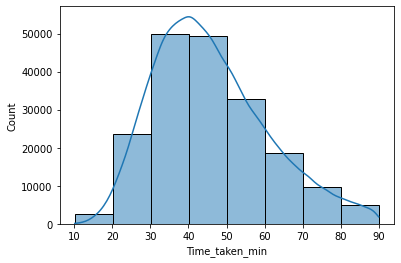

In [17]:
# The distribution of our target variable is a bit right skewed.
# Most of the deliveries happen between 30 and 50mins after ordering. 
sns.histplot(df.Time_taken_min, binwidth=10, kde=True)

In [18]:
# Creating hour of day features and day of week features.
df['Hour_of_day'] = df['created_at'].dt.hour
df['Day_of_week'] = df['created_at'].dt.weekday

In [19]:
# Dropping created_at and actual delivery time features as they are no longer needed.
df.drop(['actual_delivery_time', 'created_at'], axis=1, inplace=True)

### Duplicates treatment

In [20]:
# No duplicate values were found
df.duplicated().value_counts()

False    191749
dtype: int64

### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Creating test dataset with 20% of the rows.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
train_df.shape, test_df.shape

((153399, 15), (38350, 15))

### EDA

In [23]:
train_df.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'Time_taken_min', 'Hour_of_day',
       'Day_of_week'],
      dtype='object')

In [24]:
# Removing the dropped features and adding the new features
cat_var.append(cat_var[0])
cat_var = cat_var[3:]
cat_var.append('Hour_of_day')
cat_var.append('Day_of_week')
cat_var

['store_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'num_distinct_items',
 'market_id',
 'Hour_of_day',
 'Day_of_week']

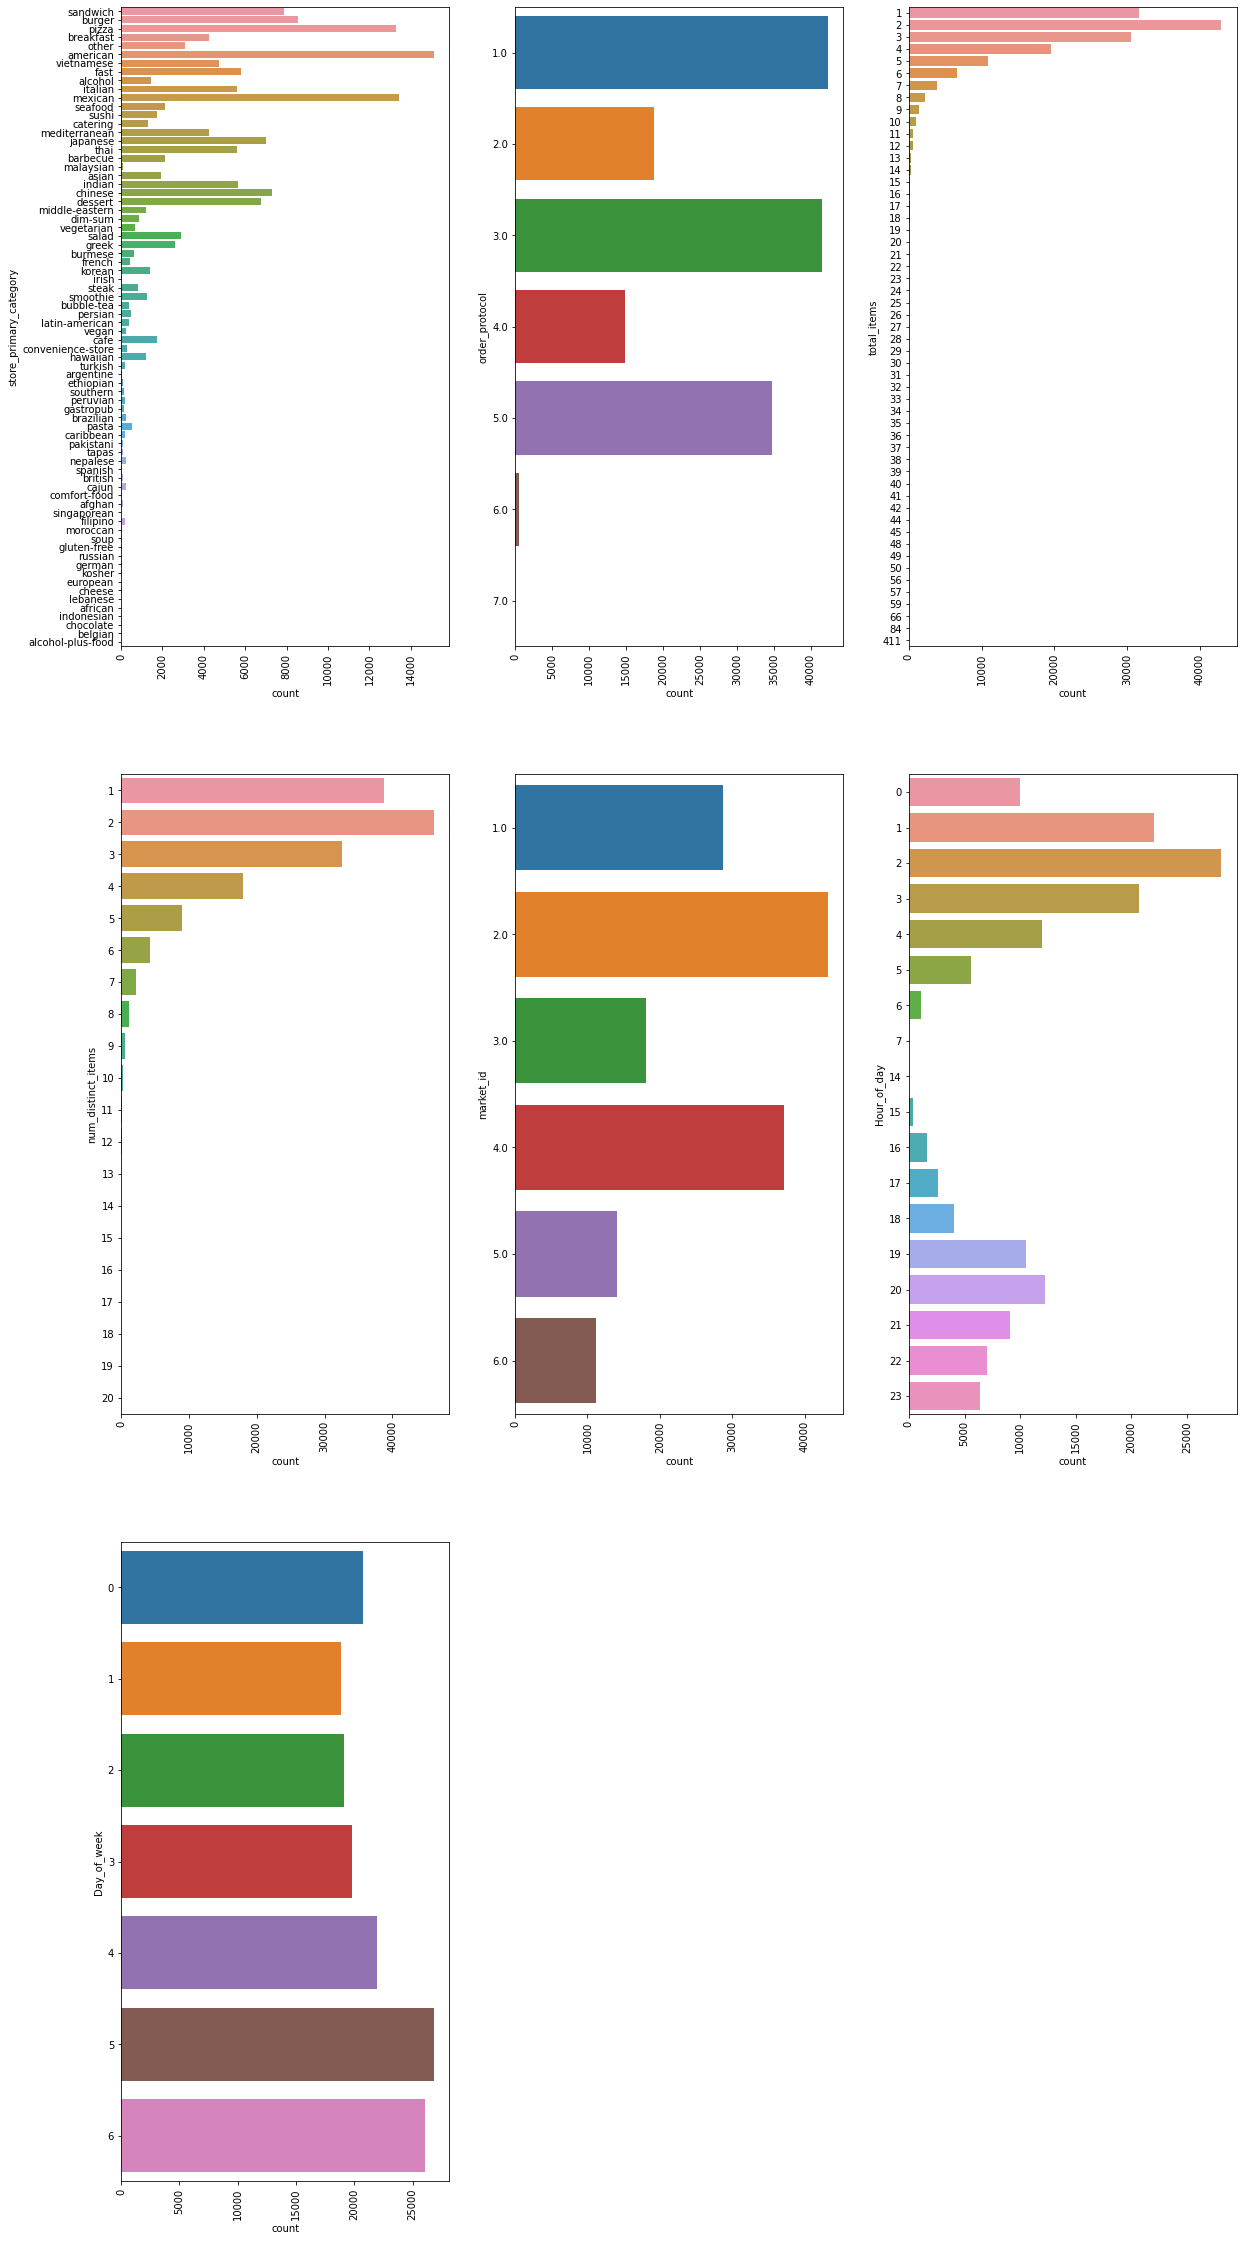

In [26]:
plt.figure(figsize=(20,40))
i = 1
for var in cat_var[1:]:
    plt.subplot(3,3,i)
    plt.xticks(rotation = '90')
    sns.countplot(y=train_df[var])
    i += 1
plt.show()

##### Insights from the count plots.
- Most of the orders are from American, pizza and mexican category restaurants. 
- Most of the orders have been made through protocols 1, 3 and 5.
- 1 and 2 distinct items are mostly ordered at once. The count starts decreasing after 2. The same goes for total items.
- Market IDs 2 and 4 dominate the dataset with highest number of orders. 
- Its weird to see that more no. of the orders have been made in the early hours of day which 1, 2 and 3. (External source: Porter is based out of b'lore which is an IT hub. Those orders might be from tech professionals working night shifts.) We also do not have any information on orders after 7 until 14:00.
- Its no surprise that most of the orders are during weekends.

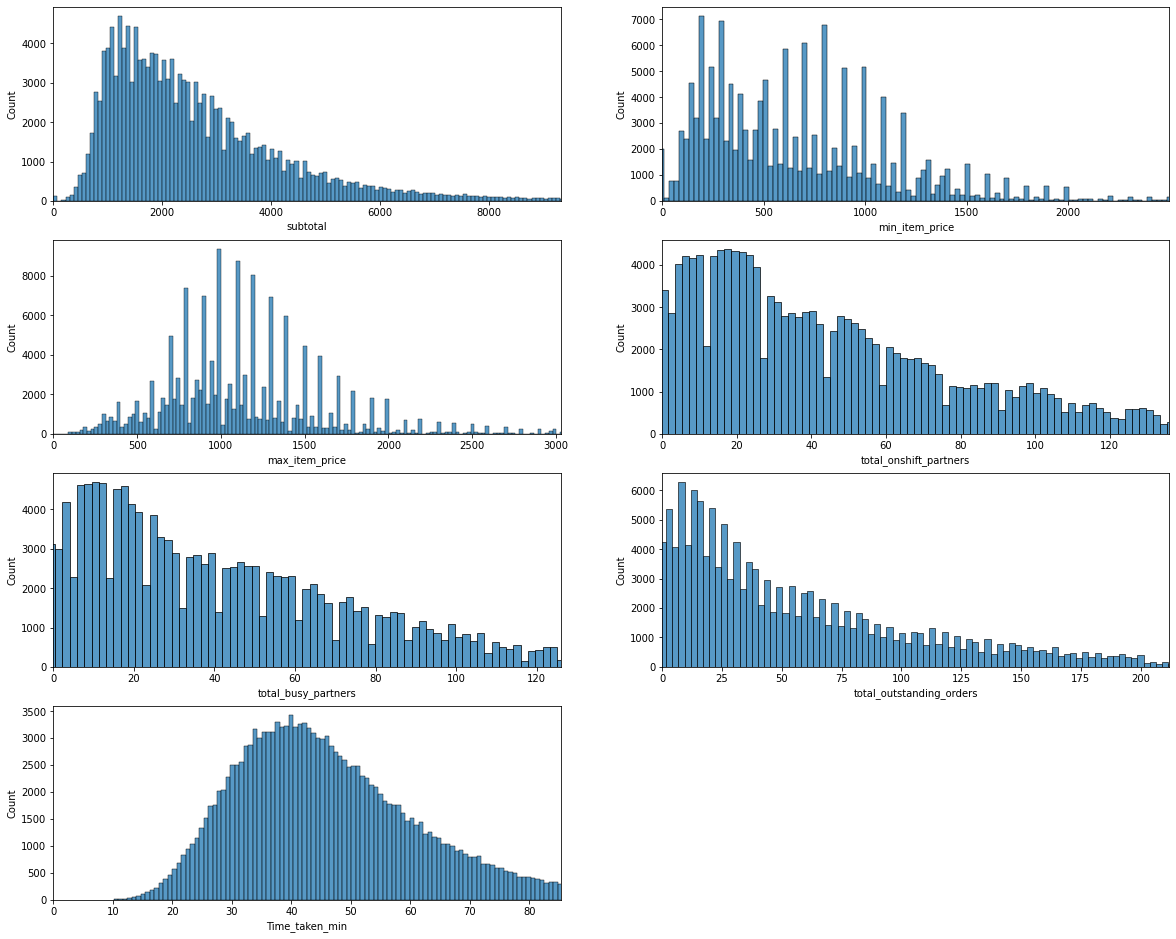

In [36]:
plt.figure(figsize=(20, 25))
i = 1
for var in cont_var:
    plt.subplot(6,2,i)
    plt.xlim([0, df[var].quantile(.99)])
    sns.histplot(train_df[var])
    i += 1
plt.show()

##### Insights from the above hist plots.
- I can see that almost all plots are heavily right skewed. This shows the presence of outliers in our dataset.
- Invoices per order generally stays around 1000 to 2000rs. Min and max item price oscillate but generally stay less than 1500-2000rs.

In [37]:
df.shape

(191749, 15)

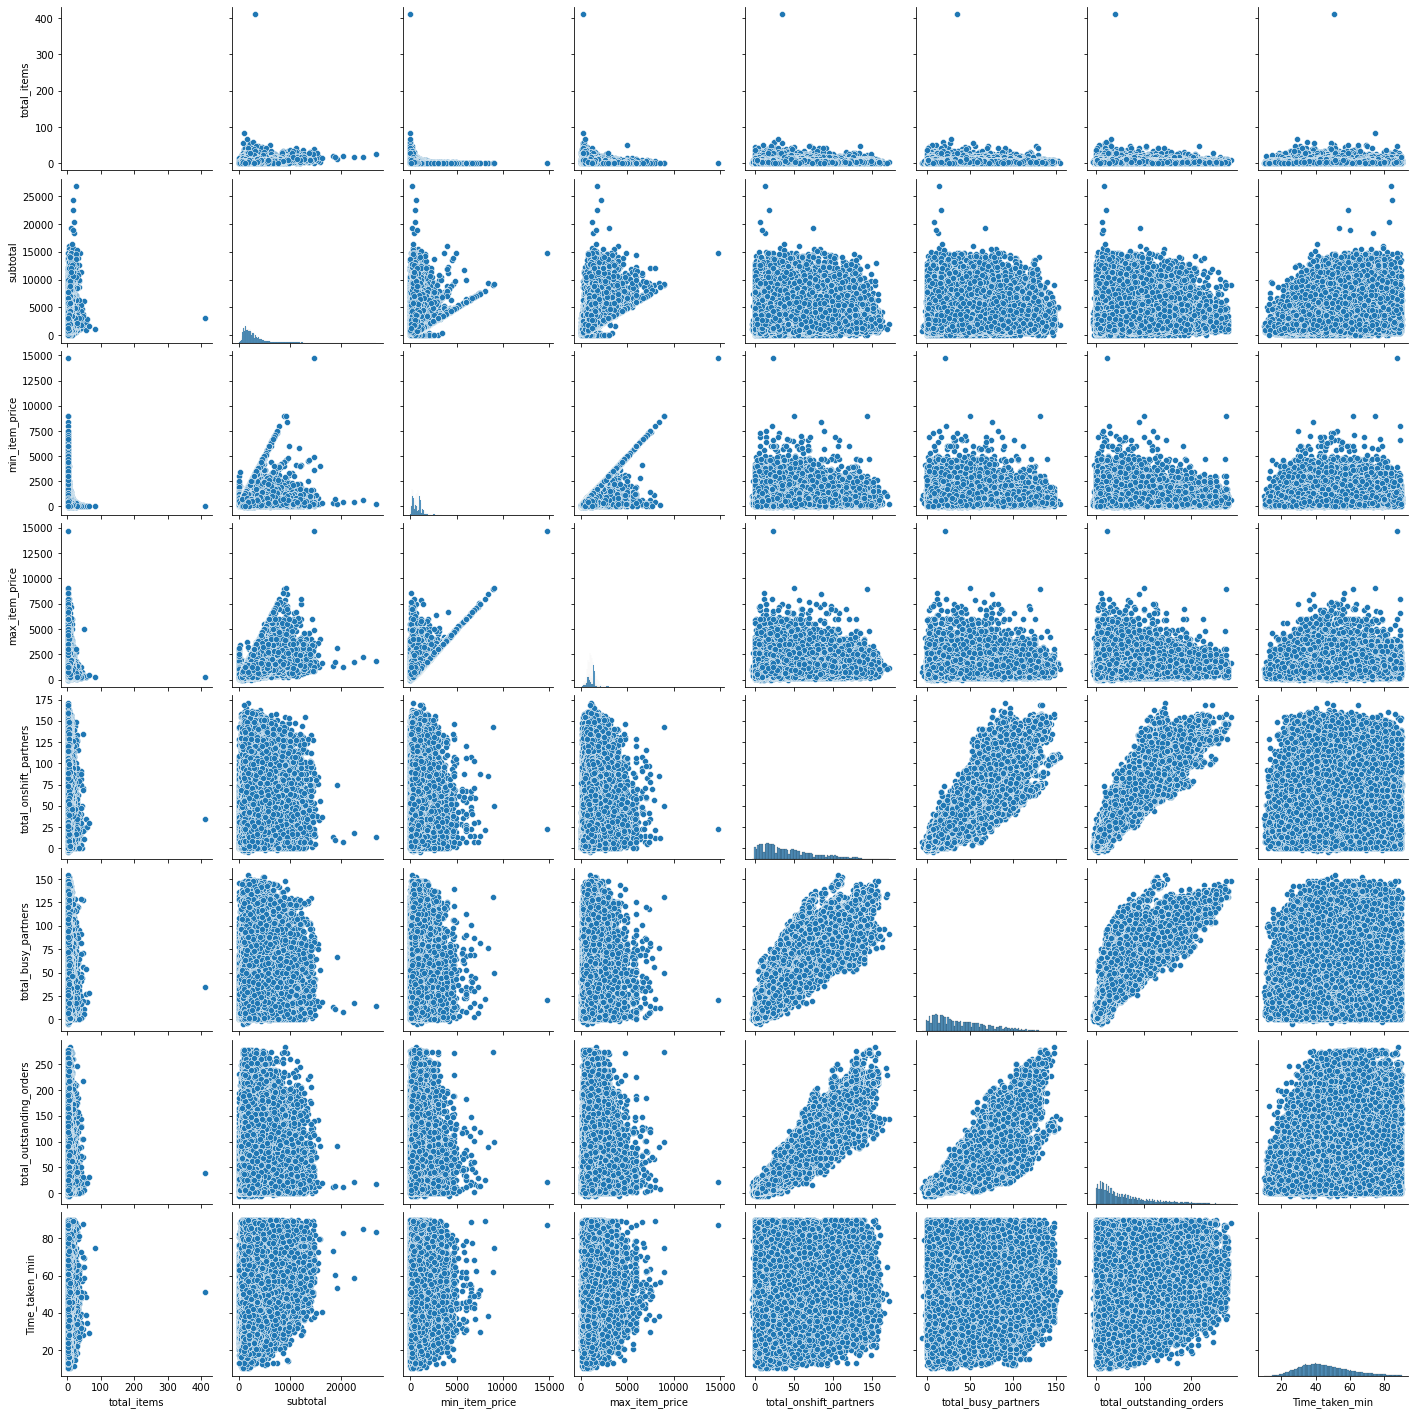

In [385]:
sns.pairplot(train_df[cont_var])

##### Insights from the above scatter plots.
- I can see a direct positive correlation between some of the continuous features. I can drop some of these to reduce the complexity in my model. 

### Data Preprocessing

#### Feature Encoding

In [386]:
# Nominal categories which need to be target encoded. 
nominal_cat = ['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'Hour_of_day', 'Day_of_week']
train_df.head(3)

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Time_taken_min,Hour_of_day,Day_of_week
10350,1.0,f55cadb97eaff2ba1980e001b0bd9842,sandwich,3.0,5,6275,5,775,1575,0.0,0.0,0.0,57.116667,19,2
162190,4.0,4ca82782c5372a547c104929f03fe7a9,burger,5.0,4,2056,4,249,729,27.0,28.0,49.0,43.433333,0,5
3173,1.0,912d2b1c7b2826caf99687388d2e8f7c,pizza,5.0,2,3621,1,1131,1181,20.0,30.0,43.0,52.250000,22,6


In [387]:
# Using Target Encoder library. 
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=nominal_cat, handle_missing='return_nan')
encoded_df = encoder.fit_transform(train_df.drop('Time_taken_min', axis=1), train_df.Time_taken_min)
train_df[nominal_cat] = encoded_df[nominal_cat]
train_df.head(3)

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Time_taken_min,Hour_of_day,Day_of_week
10350,47.917410,49.573333,43.286571,45.447457,5,6275,5,775,1575,0.0,0.0,0.0,57.116667,44.905147,43.248533
162190,45.833955,42.661718,45.507532,44.083495,4,2056,4,249,729,27.0,28.0,49.0,43.433333,42.842907,48.237837
3173,47.917410,50.056627,48.791442,44.083495,2,3621,1,1131,1181,20.0,30.0,43.0,52.250000,40.771673,46.829327


In [388]:
# Applying the learnt parameters to the test data_set. 
test_df[nominal_cat] = encoder.transform(test_df.drop('Time_taken_min', axis=1))[nominal_cat]
test_df.head(3)

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Time_taken_min,Hour_of_day,Day_of_week
159714,45.833955,43.818376,43.286571,45.447457,7,6017,7,349,999,19.0,18.0,25.0,77.100000,52.065728,43.248533
34795,45.833955,43.039535,43.286571,45.447457,2,1698,2,749,849,51.0,40.0,45.0,24.033333,40.258589,47.656368
56191,44.886886,43.875487,45.491702,44.083495,8,9700,5,500,1650,21.0,20.0,29.0,57.850000,44.905147,47.656368


<AxesSubplot:>

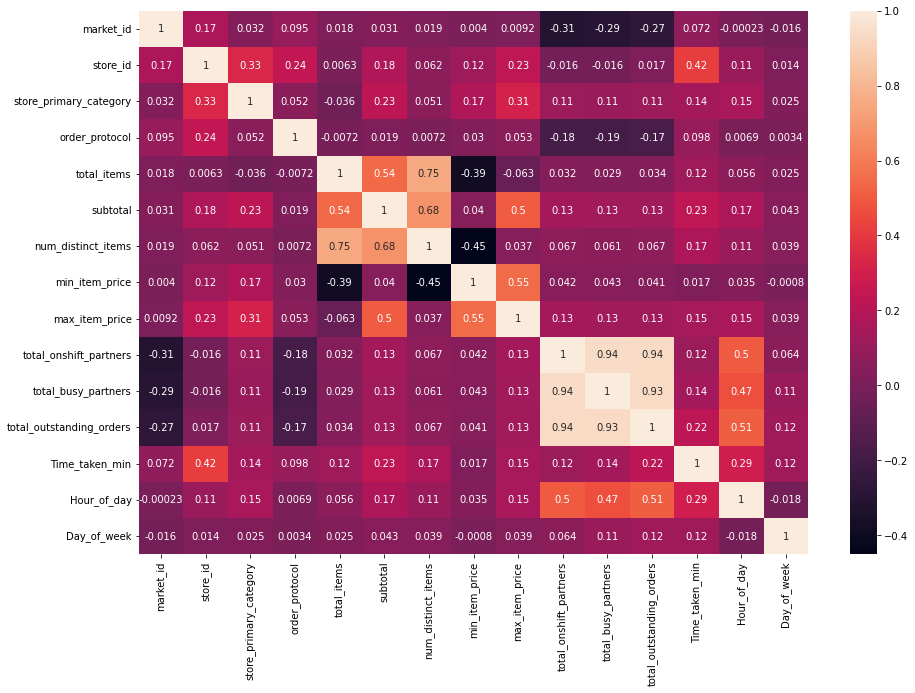

In [389]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True)

##### Inference from the above heat plot
- num_distinct_items is highly correlated with total_items and subtotal.
- Total_onshift_partners, total_busy_partners, total_outstanding orders are highly correlated with each other. 
- We can either remove the highly correlated features or keep it.
- Store_id followed by Hour_of_day and outstanding_orders are highly positive correlated with the time_taken. This is obvious that food preparation time is dependent on the store, Hour_of_day determines traffic and delivery partner availability, more number of outstanding orders results in delay in partner allocation.

#### Missing value treatment

In [390]:
train_df.isna().sum()/train_df.shape[0], test_df.isna().sum()/test_df.shape[0]

(market_id                   0.005091
 store_id                    0.000000
 store_primary_category      0.023722
 order_protocol              0.005163
 total_items                 0.000000
 subtotal                    0.000000
 num_distinct_items          0.000000
 min_item_price              0.000000
 max_item_price              0.000000
 total_onshift_partners      0.082145
 total_busy_partners         0.082145
 total_outstanding_orders    0.082145
 Time_taken_min              0.000000
 Hour_of_day                 0.000000
 Day_of_week                 0.000000
 dtype: float64,
 market_id                   0.004641
 store_id                    0.000000
 store_primary_category      0.025111
 order_protocol              0.004720
 total_items                 0.000000
 subtotal                    0.000000
 num_distinct_items          0.000000
 min_item_price              0.000000
 max_item_price              0.000000
 total_onshift_partners      0.082347
 total_busy_partners         0.08

In [391]:
# Filling the missing values using the KNN imputation technique
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

In [392]:
# All missing values have been filled. 
train_df.isna().sum()/train_df.shape[0], test_df.isna().sum()/test_df.shape[0]

(market_id                   0.0
 store_id                    0.0
 store_primary_category      0.0
 order_protocol              0.0
 total_items                 0.0
 subtotal                    0.0
 num_distinct_items          0.0
 min_item_price              0.0
 max_item_price              0.0
 total_onshift_partners      0.0
 total_busy_partners         0.0
 total_outstanding_orders    0.0
 Time_taken_min              0.0
 Hour_of_day                 0.0
 Day_of_week                 0.0
 dtype: float64,
 market_id                   0.0
 store_id                    0.0
 store_primary_category      0.0
 order_protocol              0.0
 total_items                 0.0
 subtotal                    0.0
 num_distinct_items          0.0
 min_item_price              0.0
 max_item_price              0.0
 total_onshift_partners      0.0
 total_busy_partners         0.0
 total_outstanding_orders    0.0
 Time_taken_min              0.0
 Hour_of_day                 0.0
 Day_of_week              

#### Outlier treatment

In [393]:
# Using TSNE to get the feature embeddings to visualise our n-dimentional data. 
from sklearn.manifold import TSNE

dim_red_model = TSNE(random_state=42)
embeddings = dim_red_model.fit_transform(train_df.drop('Time_taken_min', axis=1))
embeddings

array([[ -7.4818754,  16.182232 ],
       [ 13.59236  , -24.634277 ],
       [ 20.173685 ,  17.885647 ],
       ...,
       [ 15.463208 , -14.256885 ],
       [-16.71143  ,   8.436664 ],
       [-43.184464 ,  11.983074 ]], dtype=float32)

<AxesSubplot:>

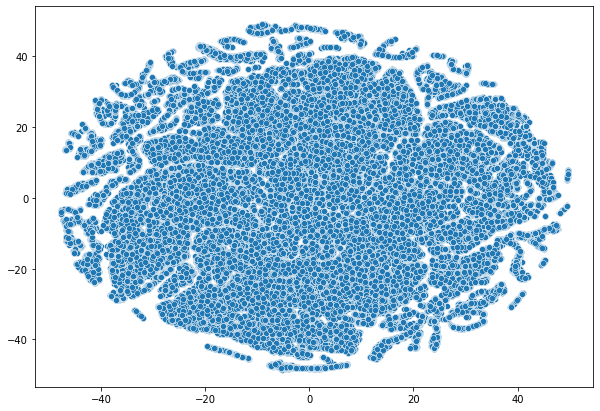

In [403]:
# The plot is globular, seems like unimodal multivariate distribution. 
# We might need a complex model to fit those points. 
# We can use elliptical envelope technique to remove the outliers. 
plt.figure(figsize=(10,7))
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1])

In [456]:
# Using elliptic envelope on embeddings to get the best contamination.
from sklearn.covariance import EllipticEnvelope

# Fitting the embeddings first to visualise and get the best parameters. 
embedd_outlier_detection = EllipticEnvelope(contamination=0.15, random_state = 42)
embedd_labels = embedd_outlier_detection.fit_predict(embeddings)

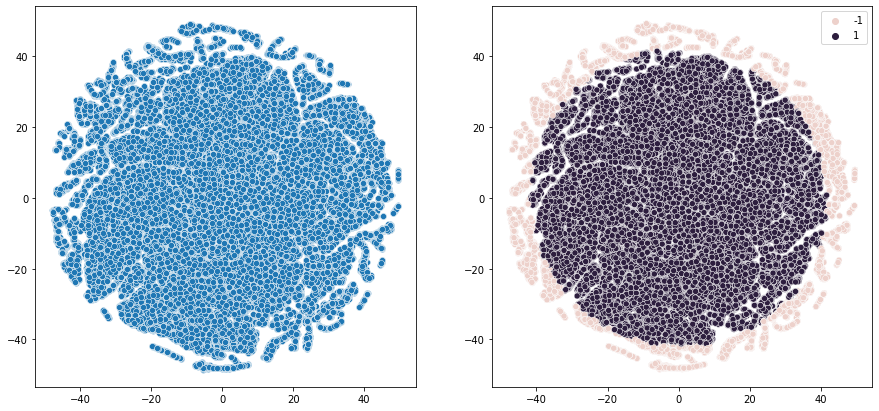

In [457]:
# 0.15 contamination seems to be sufficient to remove the outliers

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1])
plt.subplot(1,2,2)
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1], hue=embedd_labels)
plt.show()

In [453]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

#Fitting the entire train_df with contamination of 0.07.
train_outlier_detection = EllipticEnvelope(contamination=0.15, random_state = 42)
labels = train_outlier_detection.fit_predict(train_df.drop('Time_taken_min', axis=1))
train_df['labels'] = labels

In [454]:
#We can see that our max values of all features after removal are almost close to the actual 99% of features before removal.

actual_99_per = train_df[cont_var].describe(percentiles=[.05, .75, .95, .99]).T['99%']
max_after_outlier_treatment = train_df[train_df['labels'] == 1][cont_var].describe(percentiles=[.75, .95, .99]).T['max']

max_after_outlier_treatment, actual_99_per

(total_items                    9.0
 subtotal                    9280.0
 min_item_price              3029.0
 max_item_price              3500.0
 total_onshift_partners       158.0
 total_busy_partners          144.0
 total_outstanding_orders     247.0
 Time_taken_min                90.0
 Name: max, dtype: float64,
 total_items                   12.000000
 subtotal                    9290.000000
 min_item_price              2499.000000
 max_item_price              3029.000000
 total_onshift_partners       135.000000
 total_busy_partners          125.000000
 total_outstanding_orders     210.000000
 Time_taken_min                85.266667
 Name: 99%, dtype: float64)

In [455]:
# We will be removing 15% of our datapoints. Its a lot but removing will help build a better model without outliers. 
np.unique(labels, return_counts=True)[1][0]/train_df.shape[0]*100

15.000097784209807

In [458]:
train_df_new = train_df[train_df['labels'] == 1]
train_df_new.drop('labels', axis=1, inplace = True)
train_df_new.shape

(130389, 15)

#### Data Scaling

In [459]:
# Creating predictor and target datasets for both train and test. 

X_train, y_train = train_df_new.drop(['Time_taken_min'], axis=1), train_df_new['Time_taken_min']
X_test, y_test = test_df.drop('Time_taken_min', axis=1), test_df['Time_taken_min']

In [460]:
# Scaling the dataset using the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### Baseline Model (Random Forest Regressor)

In [461]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

param_grid = np.array(ParameterGrid({'n_estimators' : np.arange(25,125,25), 'max_depth' : np.arange(10,32,2)}))
r2_scores = []
rmse_scores = []

for params in param_grid:
    rf_model = RandomForestRegressor(**params, oob_score=True, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    oob_pred = rf_model.oob_prediction_
    r2_scores.append(rf_model.oob_score_)
    rmse_scores.append(mean_squared_error(y_train, oob_pred)**0.5)

r2_scores = np.array(r2_scores)
rmse_scores = np.array(rmse_scores)

In [462]:
# At max_depth of 14 and n_estimators of 100, I got an RMSE score of 12.13 on oob samples.
max(r2_scores), param_grid[np.argmax(r2_scores)], min(rmse_scores)

(0.32452623151279547,
 {'max_depth': 14, 'n_estimators': 100},
 12.13291065128588)

In [463]:
# Retraining a new model with best found parameters. 
from sklearn.metrics import mean_squared_error
best_model = RandomForestRegressor(**{'max_depth': 14, 'n_estimators': 100},  random_state=42)
best_model.fit(X_train, y_train)
r2_score(y_test, rf_model.predict(X_test)), mean_squared_error(y_test, rf_model.predict(X_test))**0.5

(0.29758292882673176, 12.473197398776138)

> R2 score of 0.3 and rmse of 12.47 was found on test dataset. RMSE of 12.4 means on an average the delivery time prediction is off by 12.4mins. 

### Neural Network model

In [583]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    

seed_everything()

In [605]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creating a function with all the necessary inputs of the NN architecture.

def create_model():
    
# Defining Dense layers and neurons in each layer.

  model = Sequential([
                      Dense(256, activation="relu", input_shape = (X_train.shape[1],), name = "hidden_layer_1"),

                      Dense(128, activation="relu", name = "hidden_layer_2"),

                      Dense(64, activation="relu", name = "hidden_layer_3"),

                      Dense(32, activation="relu", name = "hidden_layer_4"),

                      Dense(1, name = "output_layer")])
    
# Not using any of the regularisation techniques like batch normalisation or dropout as no overfitting was observed.
# Also, using batch normalisation made the model worse.

  model.compile(optimizer = "RMSprop", 
                   loss = 'MeanSquaredError', 
                   metrics = ['RootMeanSquaredError'])   # Compiling the model with RMSprop optimizer
  return model

In [621]:
# Summary of the NN architechture.
create_model().summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 256)               3840      
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_4 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 47,105
Trainable params: 47,105
Non-trainable params: 0
_________________________________________________________________


In [624]:
# Overriding the Verbose callback class to print custom lines of losses and metrics after every 10th epoch.

class VerboseCallback(tf.keras.callbacks.Callback):
    
  def on_train_begin(self, logs=None):
        print("Starting training...")
  
  def on_epoch_end(self, epoch, logs = None):
    if epoch % 10 == 0:
       print(f'Epoch {str(epoch).zfill(3)}', '- loss : ', logs['loss'], '- Rmse : ', logs['root_mean_squared_error'], 
             '- val_loss : ', logs['val_loss'], '- val_rmse : ', logs['val_root_mean_squared_error'])

  def on_train_end(self, logs=None):
        print("...Finished training")

In [625]:
# Implementing LR decay. Starting with a large LR(0.01) and it decays with each epoch. 
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr 
  
  return lr

LRdecay = LearningRateScheduler(scheduler)

In [626]:
# Using early stopping callback to stop the training if not much improvement is observed in the val_rmse score after a patience
# of 10 epochs.

# Model checkpoint Callback is also added to save the model which has the lowest val RMSE score

EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', 
                                                         patience=10,  restore_best_weights=True)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_root_mean_squared_error',
                                                             save_best_only=True,
                                                             mode='min')

In [627]:
nn_model = create_model() # Creating the model

# Training the model
history = nn_model.fit(X_train, y_train, epochs=201, batch_size=13039, validation_split=0.2, verbose=0, 
                       callbacks=[VerboseCallback(), LRdecay, EarlyStoppingCallback, ModelCheckpointCallback]) 


Starting training...
Epoch 000 - loss :  1985.83447265625 - Rmse :  44.56270217895508 - val_loss :  1366.90234375 - val_rmse :  36.971641540527344
Epoch 010 - loss :  185.585693359375 - Rmse :  13.622983932495117 - val_loss :  189.92938232421875 - val_rmse :  13.781486511230469
Epoch 020 - loss :  170.1769561767578 - Rmse :  13.045188903808594 - val_loss :  173.10107421875 - val_rmse :  13.156787872314453
Epoch 030 - loss :  167.4670867919922 - Rmse :  12.94090747833252 - val_loss :  170.5307159423828 - val_rmse :  13.058740615844727
Epoch 040 - loss :  167.22837829589844 - Rmse :  12.931681632995605 - val_loss :  170.34274291992188 - val_rmse :  13.051541328430176
Epoch 050 - loss :  167.21832275390625 - Rmse :  12.931292533874512 - val_loss :  170.3349609375 - val_rmse :  13.051243782043457
Epoch 060 - loss :  167.2181396484375 - Rmse :  12.93128490447998 - val_loss :  170.33482360839844 - val_rmse :  13.051238059997559
...Finished training


In [628]:
epochs = history.epoch
loss = history.history["loss"]
rmse = history.history["root_mean_squared_error"]
val_loss = history.history["val_loss"]
val_rmse = history.history["val_root_mean_squared_error"]

epochs[-1], min(rmse), min(val_rmse)

(64, 12.93128490447998, 13.051238059997559)

> As you can see Training stopped after 64th epoch when not much change was observed in val_rmse. Best rmse score on validation set was found to be 13.05 which is less than RF val score which was 12.1.

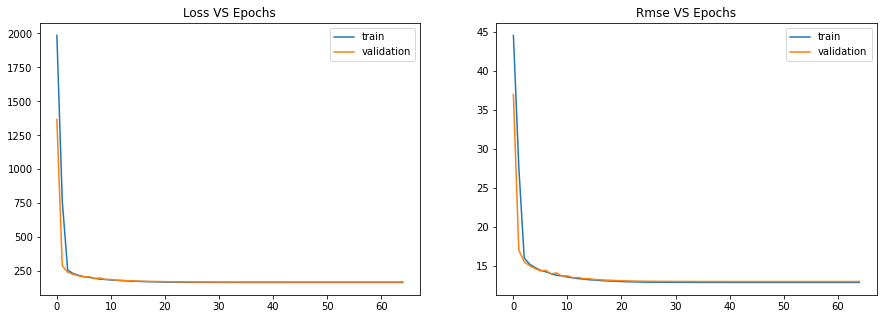

In [630]:
# As you can see from plot, there is hardly any change after the 20th epoch.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Loss VS Epochs")
sns.lineplot(x=epochs, y=loss, label='train')
sns.lineplot(x=epochs, y=val_loss, label='validation')

plt.subplot(1,2,2)
sns.lineplot(x=epochs, y=rmse, label='train')
sns.lineplot(x=epochs, y=val_rmse, label='validation')
plt.title("Rmse VS Epochs")
plt.show()

In [614]:
# Using the learnt parameters of the architecture which gave the lowest RMSE score and building the model. 
best_model =create_model()
best_model.build(input_shape =(None,14))

best_model.load_weights('tf_model.h5') # Assigning the weights to each layer in the model. 

best_model.compile(optimizer = "RMSprop", 
                   loss = 'MeanSquaredError', 
                   metrics = ['RootMeanSquaredError'])

In [616]:
best_model.evaluate(X_train, y_train)

4075/4075 [==============================] - 2s 554us/step - loss: 168.1347 - root_mean_squared_error: 12.9667


[168.13467407226562, 12.966675758361816]

In [615]:
best_model.evaluate(X_test, y_test)

1199/1199 [==============================] - 1s 538us/step - loss: 223.0110 - root_mean_squared_error: 14.9336


[223.01097106933594, 14.933551788330078]

> RMSE Score on test sets using the best NN architecture and weights was found to be 14.93 which is not an improvement over RF as RF_test_score was around 12.4. This shows that for tabular data with less complexity simple models like RF is sufficient to get the predictions.